## Thinkful Data Science
Data Science Fundamentals<br>
Unit 2: Introduction to the Data Science Toolkit<br>
Lesson 2: Challenge - What Do You See?<br>
Jan. 2019

## Visualizing Biodiversity in U.S. National Parks
National Parks are home to diverse ecosystems and wildlife, preserving and protecting the unadulterated beauty of nature.  As technology advances and inevitably expands the frontiers of civilization, it is critical to find a balance with nature.
<br><br>
I decided to download and visualize a data set containing data on the biodiversity of U.S. national parks.  The data set can be found on Kaggle at the following URL: https://www.kaggle.com/nationalparkservice/park-biodiversity
<br><br>
This data set comprises two CSV files:<br>
* parks.csv   -  contains information such as park name, state, size<br>
* species.csv -  contains information on various wildlife and plant species<br>

Below, the following data visualizations are shown:<br>
1. Number of National Parks by State<br>
2. State Area and National Park Coverate<br>
3. National Park Geographic Location<br>
4. Number of Fauna and Flora Species by National Park<br>

Additional future visualizations to explore:<br>

## 1.  States in which national parks are located

In [312]:
# import helpful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [313]:
# create data frame for national parks data
park_df = pd.read_csv('parks.csv')
park_df
df = pd.read_csv('parks.csv')

In [314]:
# group by State and Park Name to determine how many parks in each state
# store result in a new data frame
state_group = park_df.groupby('State')['Park Name'].count()
#park_df.groupby('State')

# create new data frame to store result
state_summary_df = pd.DataFrame(state_group, index=state_group.index, columns=['Park Name'])

# clean up data
# rename column from 'Park Name' to 'Park Count'
state_summary_df.rename(columns={'Park Name': 'Park Count'}, inplace=True)

# next, remove any entries with >1 state, increment state count appropriately
# procedure:
# - get list of entries with > 1 state, store in list
# - iterate through list, updating data frame appropriately
# - remove corresponding row in data frame
multi_states = [x for x in state_summary_df.index if len(x.split())>1]

# convert index to list
index_list = list(state_summary_df.index)

# iterate through list, update data frame appropriately
for states in multi_states:
    # get state abbreviations
    current_states = states.split(',')
    for state in current_states:
        state_abbrev = state.strip()
        
        # update data frame
        if state_abbrev in state_summary_df.index:
            state_summary_df.loc[state_abbrev] += 1
        else:
            state_summary_df.loc[state_abbrev] = 1
    
# remove rows from data frame
# iterate through list, keep list of indices to remove
index_remove = []
for states in multi_states:
    current_index = index_list.index(states)
    index_remove.append(current_index)

state_summary_df.drop(state_summary_df.index[index_remove], inplace=True)

# sort alphabetically by index (state)
state_summary_df.sort_index(inplace=True)

#print(state_count_df)
#state_count_df
#print(state_count_df.to_string())
display(state_summary_df)

#print(index_remove)
#index_row = index_list.index(states)
#state_count_df.drop(state_count_df.index[index_row], inplace=True)
#print(index_list.index(states))

#print('CA' in state_count_df.index)
#state_count_df.loc['CA'] += 1
#state_count_df.loc['ZZ'] = 1
#print(state_count_df)

,Park Count
State,
AK,8
AR,1
AZ,3
CA,8
CO,4
FL,3
HI,2
ID,1
KY,1


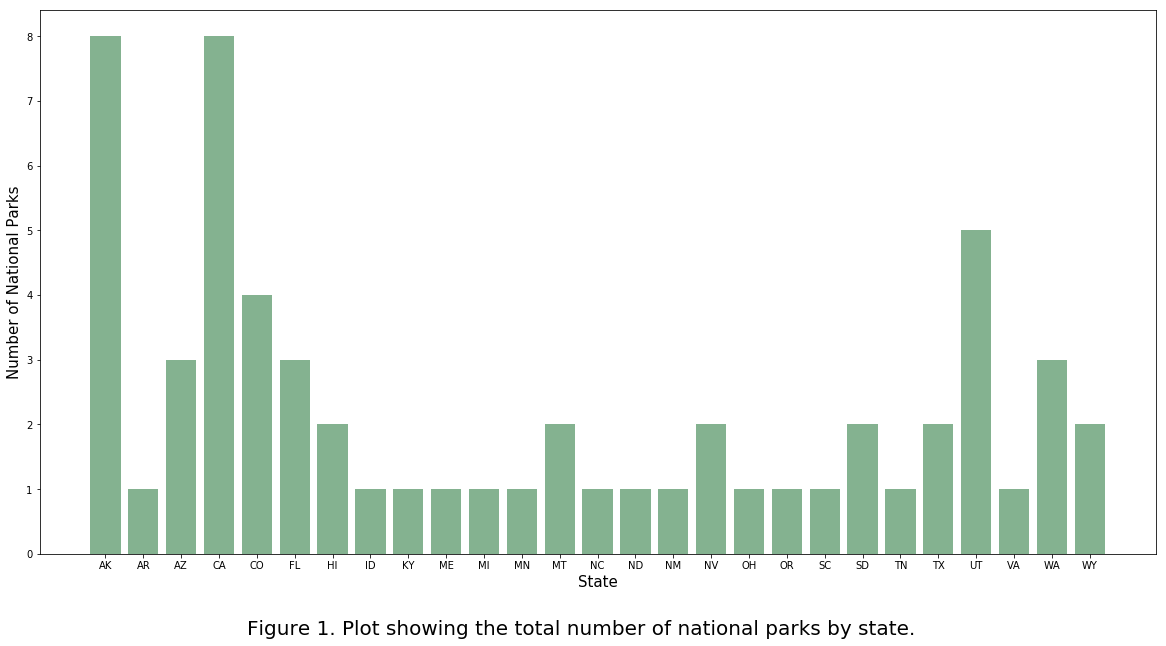

In [315]:
# plot Number of National Parks vs. State
plt.figure(figsize=(20, 10));
plt.bar(state_summary_df.index, state_summary_df['Park Count'], 
        color=(11/255, 102/255, 35/255), 
        alpha=0.5);
plt.xlabel('State', fontsize=15)
plt.ylabel('Number of National Parks', fontsize=15)

fig_caption = 'Figure 1. Plot showing the total number of national parks by state.'
plt.text(3.75, -1.25, fig_caption, fontsize=20)

plt.show()

In [316]:
# groupby and sum method to obtain total 
# acres of national park within each state

grp = park_df.groupby('State')['Acres'].sum()

# need to clean data similarly to above
# namely, some entries include >1 state
# clean series of grouped data to have
# entries of total acreage for each state

multi_states = [x for x in grp.index if len(x.split())>1]

# convert index to list
index_list = list(grp.index)

# iterate through list, update series appropriately
for states in multi_states:
    
    # get total acreage for multi state entries
    # assume total acreage evenly distributed among states
    # calculate acreage per state
    num_states = len(states.split(','))
    total_acreage = grp.loc[states]
    acre_per_state = total_acreage / num_states
    
    # get state abbreviations
    current_states = states.split(',')
    for state in current_states:
        state_abbrev = state.strip()
        
        # update series
        if state_abbrev in grp.index:
            grp.loc[state_abbrev] += acre_per_state
        else:
            grp.loc[state_abbrev] = acre_per_state
    
# remove rows from data frame
# iterate through list, keep list of indices to remove
index_remove = []
for states in multi_states:
    current_index = index_list.index(states)
    index_remove.append(current_index)

grp.drop(grp.index[index_remove], inplace=True)
#state_summary_df.drop(state_summary_df.index[index_remove], inplace=True)

# sort alphabetically by state
grp.sort_index(inplace=True)

# add Series as column to data frame state_summary_df
# first, check to make sure indices from state_summary_df
# and grp are the same
compare_indices = state_summary_df.index == grp.index
if compare_indices.all():
    state_summary_df.loc[:, 'Park Acreage'] = grp[:]

display(state_summary_df)

,Park Count,Park Acreage
State,,
AK,8,3.115925e+07
AR,1,5.550000e+03
AZ,3,1.402376e+06
CA,8,5.282470e+06
CO,4,3.938840e+05
FL,3,1.746163e+06
HI,2,3.525250e+05
ID,1,7.399303e+05
KY,1,5.283000e+04


## 2. Looking at the % area coverage by national parks

In [317]:
# Use dictionary to store (state: state land area) as (key: value) pairs
# NOTE: state area values entered in sq. miles (info from Wikipedia); then converted to acres
state_area = {}
state_area['AK'] = 663268
state_area['AR'] = 53180
state_area['AZ'] = 113990
state_area['CA'] = 163696
state_area['CO'] = 104094
state_area['FL'] = 65755
state_area['HI'] = 10931
state_area['ID'] = 83797
state_area['KY'] = 40408
state_area['ME'] = 35385
state_area['MI'] = 96716
state_area['MN'] = 86936
state_area['MT'] = 147040
state_area['NC'] = 53819
state_area['ND'] = 70762
state_area['NM'] = 121699
state_area['NV'] = 110577
state_area['OH'] = 44825
state_area['OR'] = 98381
state_area['SC'] = 32030
state_area['SD'] = 77116
state_area['TN'] = 42143
state_area['TX'] = 268581
state_area['UT'] = 84899
state_area['VA'] = 42774.2
state_area['WA'] = 71362
state_area['WY'] = 97914

# convert from sq. miles to acres
# 1 sq. mile = 640 acres
for key in state_area.keys():
    state_area[key] *= 640
    
# convert dictionary to Series data structure
state_acreage = pd.Series(state_area)

In [318]:
# add column of state acreage data to data frame state_summary_df
compare_indices = state_acreage.index == state_summary_df.index
if compare_indices.all():
    state_summary_df.loc[:, 'State Acreage'] = state_acreage[:]

# add column of % national park coverage to data frame state_summary_df
state_summary_df.loc[:, '% National Park Coverage'] = 100 * state_summary_df['Park Acreage'] / state_summary_df['State Acreage']
    
display(state_summary_df);

,Park Count,Park Acreage,State Acreage,% National Park Coverage
State,,,,
AK,8,3.115925e+07,424491520.0,7.340371
AR,1,5.550000e+03,34035200.0,0.016307
AZ,3,1.402376e+06,72953600.0,1.922285
CA,8,5.282470e+06,104765440.0,5.042188
CO,4,3.938840e+05,66620160.0,0.591238
FL,3,1.746163e+06,42083200.0,4.149311
HI,2,3.525250e+05,6995840.0,5.039066
ID,1,7.399303e+05,53630080.0,1.379693
KY,1,5.283000e+04,25861120.0,0.204283


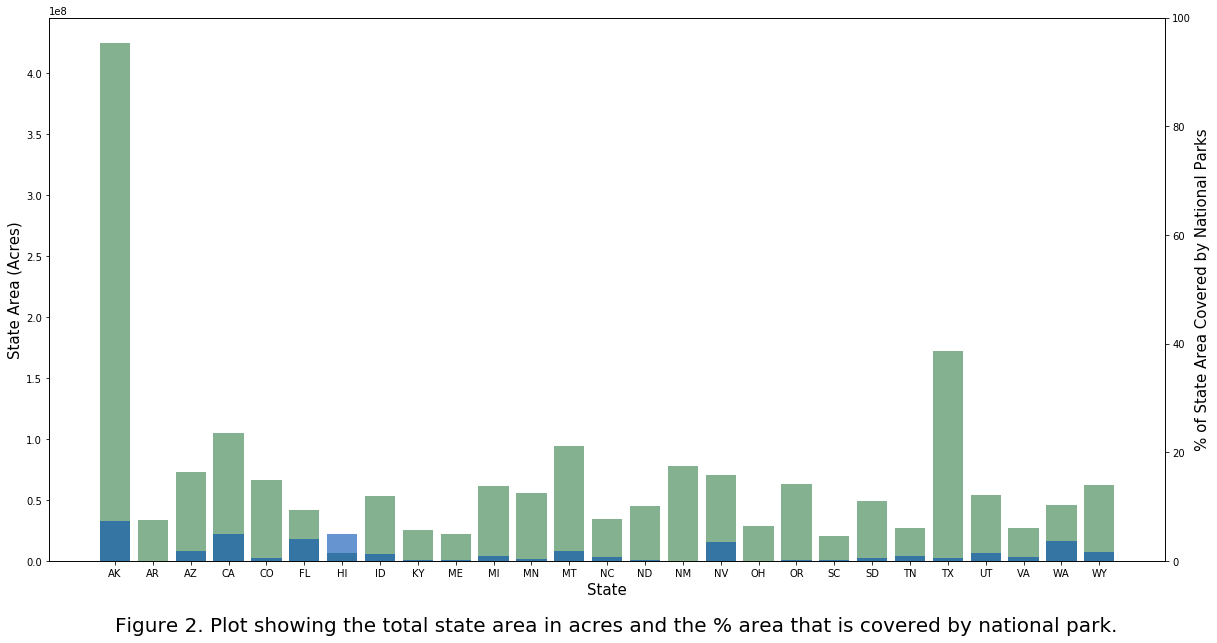

In [319]:
# plot State Area (Acres) vs. State and % State Area Covered by National Parks vs. State
# overlay two bar graphs

fig, ax_1 = plt.subplots(figsize=(20,10))

# mirror axes
ax_2 = ax_1.twinx()

# plot
ax_1.bar(state_summary_df.index, 
         state_summary_df['State Acreage'], 
         color=(11/255,102/255,35/255), alpha=0.5)
ax_2.bar(state_summary_df.index, 
         state_summary_df['% National Park Coverage'],
         color=(0, 0.3, 0.7), alpha=0.6)

# format
ax_1.set_xlabel('State', fontsize=15)
ax_1.set_ylabel('State Area (Acres)', fontsize=15)
ax_2.set_ylabel('% of State Area Covered by National Parks', fontsize=15)
ax_2.set_ylim([0,100])

fig_caption = 'Figure 2. Plot showing the total state area in acres and the % area that is covered by national park.'
plt.text(0, -13, fig_caption, fontsize=20)

plt.show()

## 3. Visualize U.S. National Parks by geographic location

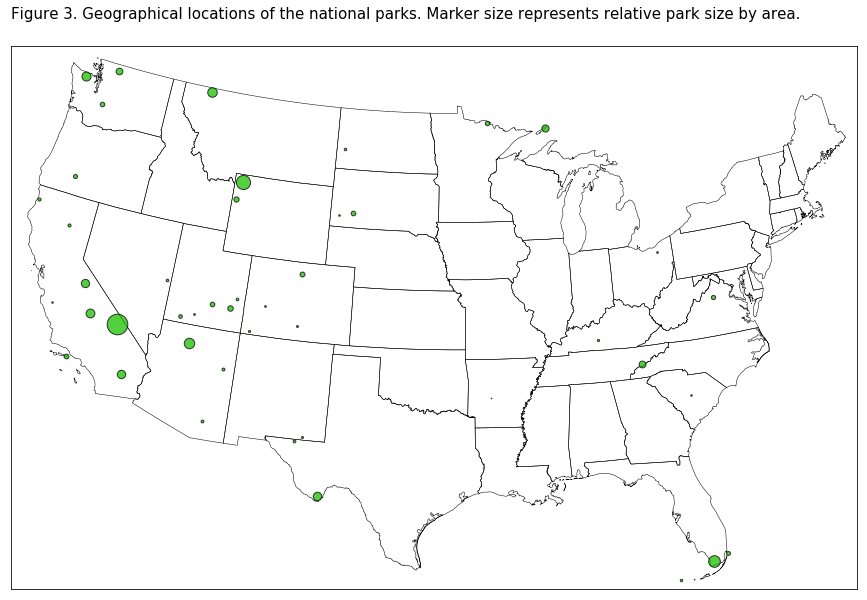

In [320]:
# reference for plotting U.S. map of contiguous states: 
# https://gis.stackexchange.com/questions/198530/plotting-us-cities-on-a-map-with-matplotlib-and-basemap
from mpl_toolkits.basemap import Basemap
import math

# create figure and set size
fig = plt.figure(figsize=(20,10))

# call Basemap
my_map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
              projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# load the shapefile, use the name 'states'
my_map.readshapefile('st99_d00', name='states', drawbounds=True)

# park size and longitude, latitude
lon = df['Longitude']
lat = df['Latitude']
park_acre = df['Acres']
num_parks = len(park_acre)

# variables for scaling markersize for plotting
min_park_acre = min(park_acre)
max_park_acre = max(park_acre)
min_markersize = 0.5

# plot
for ii in range(0, num_parks):
    x_map, y_map = map(lon[ii], lat[ii])
    area = park_acre[ii]
    markersize_scale = area / min_park_acre
    markersize_val = min_markersize * markersize_scale
    my_map.plot(x_map, y_map, 
             marker='o', 
             color=(0.1,0.75,0),
             alpha=0.75,
             markersize=np.sqrt(markersize_val),
             #markersize=5,
             markeredgecolor=(0,0,0)
            )
    
fig_caption = 'Figure 3. Geographical locations of the national parks. Marker size represents relative park size by area.'
plt.annotate(fig_caption, xy=(0, 1.05), xycoords='axes fraction', fontsize=15)
    
plt.show()

## 4. Visualizing the Biodiversity of National Parks

In [321]:
# create data frame containing species data

spec_df = pd.read_csv('species.csv', low_memory=False)
display(spec_df);

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
5,ACAD-1005,Acadia National Park,Mammal,Carnivora,Felidae,Lynx canadensis,Canada Lynx,Approved,Not Confirmed,Native,NaN,NaN,NaN,NaN
6,ACAD-1006,Acadia National Park,Mammal,Carnivora,Felidae,Lynx rufus,"Bay Lynx, Bobcat, Red Lynx, Wild Cat",Approved,Not Present (Historical Report),Not Native,NaN,Vagrant,NaN,NaN
7,ACAD-1007,Acadia National Park,Mammal,Carnivora,Mephitidae,Mephitis mephitis,"Eastern Skunk, Polecat, Striped Skunk",Approved,Not Present (Historical Report),Native,NaN,NaN,NaN,NaN
8,ACAD-1008,Acadia National Park,Mammal,Carnivora,Mustelidae,Lutra canadensis,"Otter, River Otter",Approved,Present,Native,Common,Breeder,NaN,NaN
9,ACAD-1009,Acadia National Park,Mammal,Carnivora,Mustelidae,Martes pennanti,"Blackcat, Fisher, Pekan",Approved,Present,Native,Rare,NaN,NaN,NaN


In [322]:
# get all unique Category names
unique_category = spec_df['Category'].unique()
for category in unique_category:
    print(category)

Mammal
Bird
Reptile
Amphibian
Fish
Vascular Plant
Spider/Scorpion
Insect
Invertebrate
Fungi
Nonvascular Plant
Crab/Lobster/Shrimp
Slug/Snail
Algae


In [323]:
# define list containing categories corresponding to fauna or flora
# note that fungi is not strictly flora, although I am classifying it as such here
fauna_categories = ['Mammal',
                    'Bird',
                    'Reptile',
                    'Amphibian',
                    'Fish',
                    'Spider/Scorpion',
                    'Insect',
                    'Invertebrate',
                    'Crab/Lobster/Shrimp',
                    'Slug/Snail'
                    ]
flora_categories = ['Vascular Plant',
                    'Fungi',
                    'Nonvascular Plant',
                    'Algae'
                    ]

In [324]:
# make new data frame 
# containing # fauna and # flora species
# for each national park

park_names = spec_df['Park Name'].unique()
num_parks = len(park_names)

# initialize data frame, # fauna / flora species set to 0
fauna_flora_df = pd.DataFrame(data=np.zeros([num_parks, 2]), 
                              index=park_names,
                              columns=['# Fauna Species', '# Flora Species'],
                              dtype=int)


In [325]:
# get number of species for each category for each park
grp = spec_df.groupby(['Park Name', 'Category'])['Species ID'].count()
display(grp)

Park Name                                       Category           
Acadia National Park                            Amphibian                15
                                                Bird                    364
                                                Fish                     38
                                                Mammal                   55
                                                Reptile                  11
                                                Vascular Plant         1226
Arches National Park                            Amphibian                 8
                                                Bird                    205
                                                Fish                     11
                                                Mammal                   59
                                                Reptile                  20
                                                Vascular Plant          745
Badlands National Pa

In [326]:
# iterate through multi index series, keep track of # fauna / flora species

# loop through each park name
for name, category_grp in grp.groupby(level='Park Name'):
    
    # loop through each category and count
    for category, count in category_grp.groupby(level='Category'):
        
        # add # fauna / flora species accordingly
        if category in fauna_categories:
            fauna_flora_df.loc[name]['# Fauna Species'] += count
        if category in flora_categories:
            fauna_flora_df.loc[name]['# Flora Species'] += count

display(fauna_flora_df)

,# Fauna Species,# Flora Species
Acadia National Park,483,1226
Arches National Park,303,745
Badlands National Park,591,798
Big Bend National Park,632,1637
Biscayne National Park,1172,554
Black Canyon of the Gunnison National Park,271,835
Bryce Canyon National Park,311,975
Canyonlands National Park,358,865
Capitol Reef National Park,363,1203
Carlsbad Caverns National Park,541,995


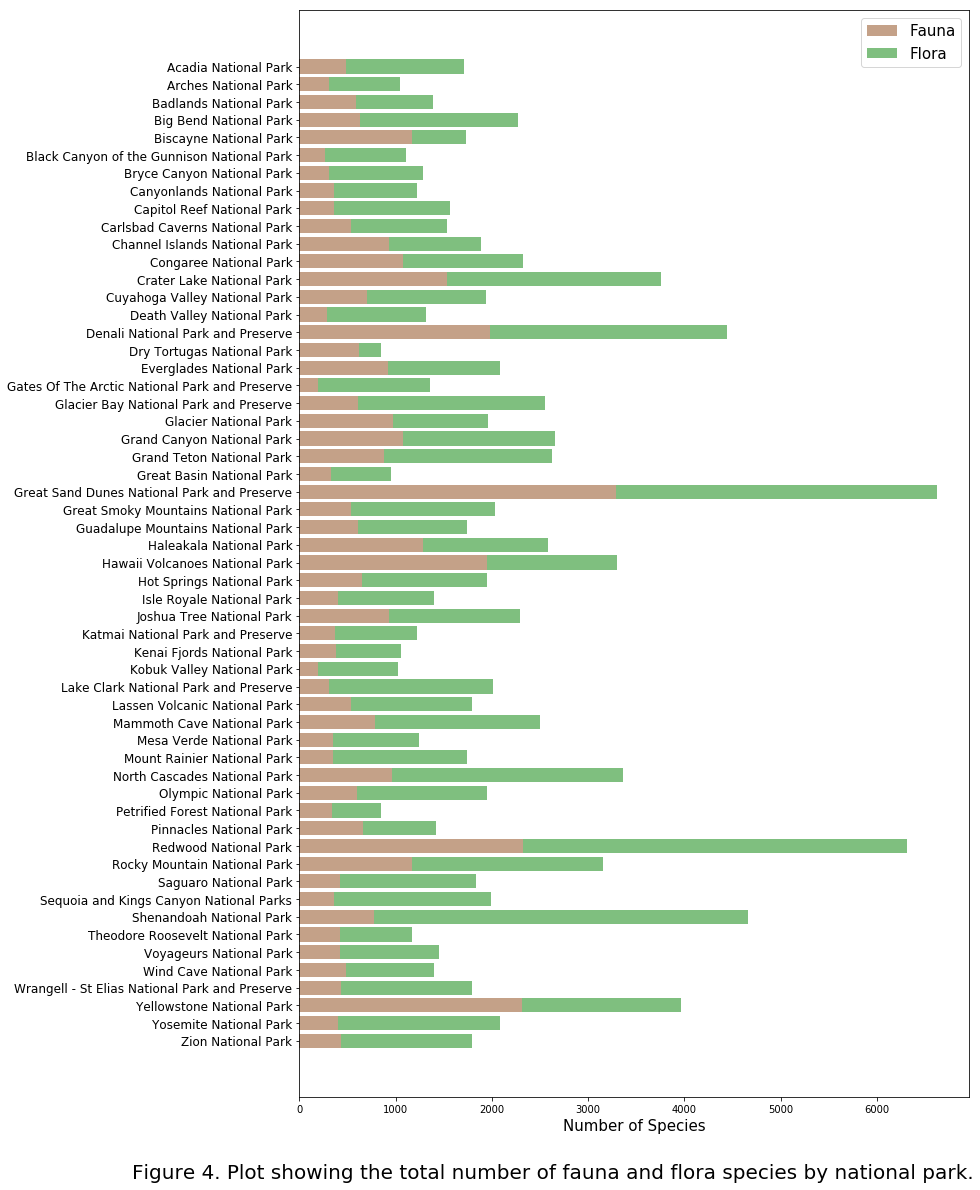

In [327]:
# plot [# fauna species | # flora species] as horizontal bar for each national park
# general syntax for creating a horizontal bar graph
# matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)

# QUESTIONS:
# 1) how do I get black edge around each section of each bar?
# 2) how do I create a legend from the plot below without having to improvise such a solution as below

fig, ax = plt.subplots(figsize=(12,20));

count = 0
for park in fauna_flora_df.index:
    
    num_fauna = fauna_flora_df.loc[park, '# Fauna Species']
    num_flora = fauna_flora_df.loc[park, '# Flora Species']
    
    plt.barh(-count, num_fauna, height=0.8, align='center', color=(139/255,69/255,19/255), alpha=0.5)
    plt.barh(-count, num_flora, height=0.8, left=num_fauna, align='center', color='green', alpha = 0.5)
    
    count += 1

# format axes
ax.set_xlabel('Number of Species', fontsize=15);
ax.set_yticks(np.arange(0, -count, step=-1));
ax.set_yticklabels(list(sorted(state_park_fauna_flora.keys())), fontsize=12);


# hack a solution for legend
color_values = ((139/255,69/255,19/255), 'green');
h = plt.barh([100,100], [0,0], height=0, color=color_values, alpha=0.5);
plt.legend(h, ('Fauna', 'Flora'), fontsize=15);

fig_caption = 'Figure 4. Plot showing the total number of fauna and flora species by national park.'
#plt.text(0, -100, fig_caption, fontsize=20)
plt.annotate(fig_caption, xy=(-0.25, -0.075), xycoords='axes fraction', fontsize=20)

plt.show();